# Module H: Section 22.1-22.3
## Ordinary Differential Equations: Boundary Value Problems

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fmin

1. Given the ODE with the boundary conditions y(0)=0 and y(12)=0, $y′′+0.5x2−6x=0$ what′s the value of $y’(0)$?

y'(0) = -72.00000000000013


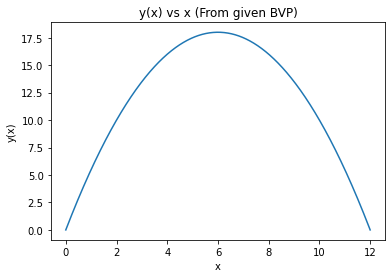

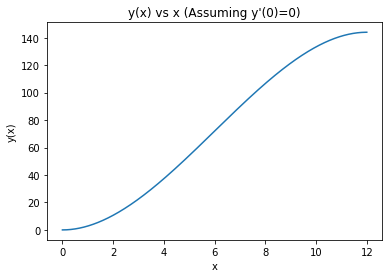

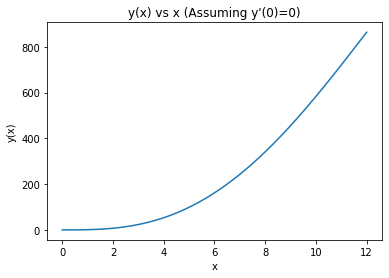

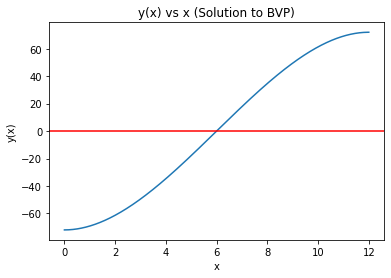

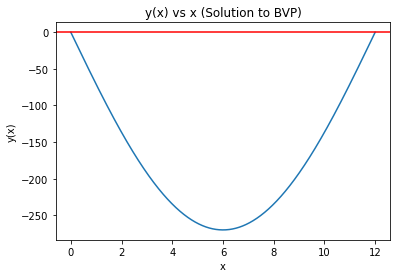

Calculated y(0) = 0.0 and y(12) = -0.0
Expected y(0) = 0 and y(12) = 0


In [2]:
# Given the following boundary value problem:
y_0 = 0
y_12 = 0
y_prime_prime_func = lambda x: -(0.5*x**2 - 6*x)

# Find the peak of the function
y_prime_prime_max_i = fmin(lambda x: (0.5*x**2 - 6*x), 0, disp=False)[0]

# Integrate the function to find the value of y_prime at the peak
y_prime_mid = quad(y_prime_prime_func, 0, y_prime_prime_max_i)[0]
print(f"y'(0) = {-y_prime_mid}")


# Verify
x = np.linspace(0, 12, 1000)
y_prime_prime = y_prime_prime_func(x)

# Integrate y'' to get y'
y_prime = np.zeros(len(x))
y_prime[0] = 0
for i in range(1, len(x)):
    y_prime[i] = y_prime[i-1] + (y_prime_prime[i] + y_prime_prime[i-1]) * (x[i] - x[i-1]) / 2

# Plot
plt.plot(x, y_prime_prime)
plt.xlabel('x')
plt.ylabel('y''(x)')
plt.title('y''(x) vs x (From given BVP)')
plt.show()

plt.plot(x, y_prime)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('y(x) vs x (Assuming y\'(0)=0)')
plt.show()


# Integrate y' to get y
y = np.zeros(len(x))
y[0] = 0
for i in range(1, len(x)):
    y[i] = y[i-1] + (y_prime[i] + y_prime[i-1]) * (x[i] - x[i-1]) / 2


# Plot
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('y(x) vs x (Assuming y\'(0)=0)')
plt.show()

# Find y_prime
y_prime = y_prime - y_prime_mid

# Plot
plt.plot(x, y_prime)
plt.axhline(y=0, color='r')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('y(x) vs x (Solution to BVP)')
plt.show()

# Integrate y' to get y
y = np.zeros(len(x))
y[0] = 0
for i in range(1, len(x)):
    y[i] = y[i-1] + (y_prime[i] + y_prime[i-1]) * (x[i] - x[i-1]) / 2

# Plot
plt.plot(x, y)
plt.axhline(y=0, color='r')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('y(x) vs x (Solution to BVP)')
plt.show()

# Verify y(0) and y(12)
print(f"Calculated y(0) = {round(y[0], 2)} and y(12) = {round(y[-1], 2)}")
print(f"Expected y(0) = {y_0} and y(12) = {y_12}")